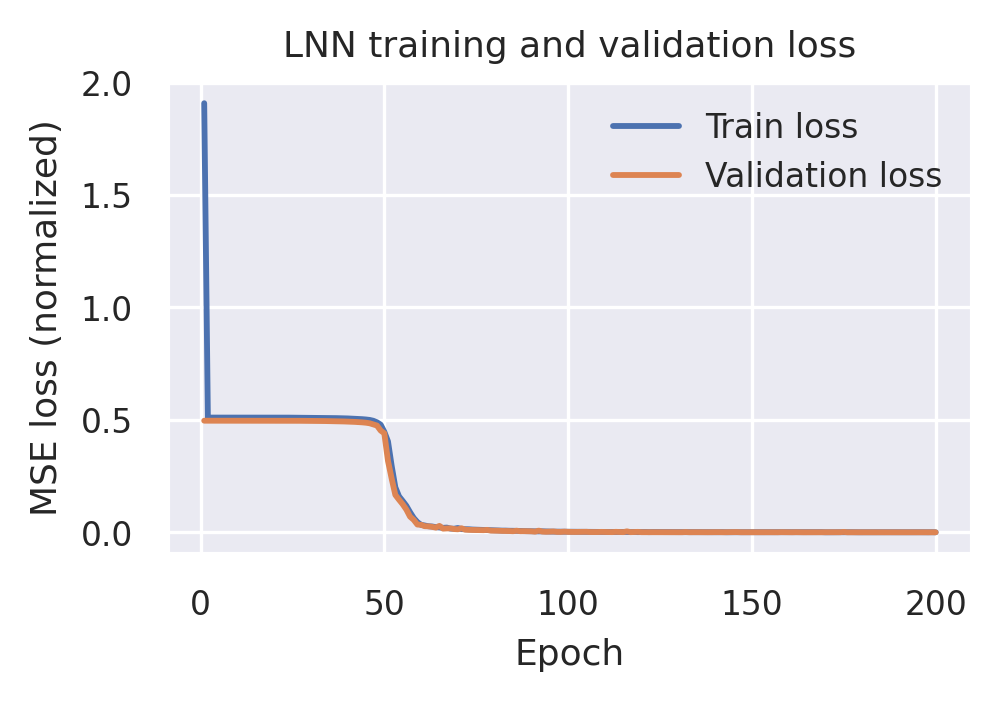

In [1]:
import json
from pathlib import Path

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# ---------------- Paths ----------------
OUT_DIR = Path("/home/iitgn-robotics/Debojit_WS/double-pendulum-trajectory/data/SampleIdeal2/lnn_model_Final1_5sec")
metrics_path = OUT_DIR / "metrics.json"

with open(metrics_path, "r") as f:
    metrics = json.load(f)

train_loss = metrics["history"]["train_loss"]
val_loss   = metrics["history"]["val_loss"]
epochs = list(range(1, len(train_loss) + 1))

# ---------------- Seaborn style for IEEE two-column ----------------
sns.set_theme(
    style="darkgrid",   # dark grid as you asked
    context="paper",    # good sizing for papers
    font_scale=0.9,     # tweak if you want slightly bigger/smaller text
)

# Typical single-column IEEE figure ~3.4 in wide
fig, ax = plt.subplots(figsize=(3.4, 2.4), dpi=300)

# Put into a DataFrame so we can use seaborn.lineplot nicely
df = pd.DataFrame({
    "Epoch": epochs,
    "Train loss": train_loss,
    "Validation loss": val_loss,
})

# Melt to long format for seaborn
df_melt = df.melt(id_vars="Epoch", var_name="Split", value_name="Loss")

sns.lineplot(
    data=df_melt,
    x="Epoch",
    y="Loss",
    hue="Split",
    ax=ax,
    linewidth=1.4,
)

ax.set_xlabel("Epoch")
ax.set_ylabel("MSE loss (normalized)")
ax.set_title("LNN training and validation loss")
ax.legend(loc="upper right", frameon=False)

fig.tight_layout()
fig.savefig(OUT_DIR / "lnn_train_val_loss.png", bbox_inches="tight")
plt.show()


In [ ]:
import json
from pathlib import Path

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# ---------------- Paths ----------------
OUT_DIR = Path("/home/iitgn-robotics/Debojit_WS/double-pendulum-trajectory/data/SampleStiction1/lnn_model_stictionV1")
metrics_path = OUT_DIR / "metrics.json"

with open(metrics_path, "r") as f:
    metrics = json.load(f)

train_loss = metrics["history"]["train_loss"]
val_loss   = metrics["history"]["val_loss"]
epochs = list(range(1, len(train_loss) + 1))

# ---------------- Seaborn style for IEEE two-column ----------------
sns.set_theme(
    style="darkgrid",   # dark grid as you asked
    context="paper",    # good sizing for papers
    font_scale=0.9,     # tweak if you want slightly bigger/smaller text
)

# Typical single-column IEEE figure ~3.4 in wide
fig, ax = plt.subplots(figsize=(3.4, 2.4), dpi=300)

# Put into a DataFrame so we can use seaborn.lineplot nicely
df = pd.DataFrame({
    "Epoch": epochs,
    "Train loss": train_loss,
    "Validation loss": val_loss,
})

# Melt to long format for seaborn
df_melt = df.melt(id_vars="Epoch", var_name="Split", value_name="Loss")

sns.lineplot(
    data=df_melt,
    x="Epoch",
    y="Loss",
    hue="Split",
    ax=ax,
    linewidth=1.4,
)

ax.set_xlabel("Epoch")
ax.set_ylabel("MSE loss (normalized)")
ax.set_title("LNN training and validation loss")
ax.legend(loc="upper right", frameon=False)

fig.tight_layout()
fig.savefig(OUT_DIR / "lnn_train_val_loss.png", bbox_inches="tight")
plt.show()


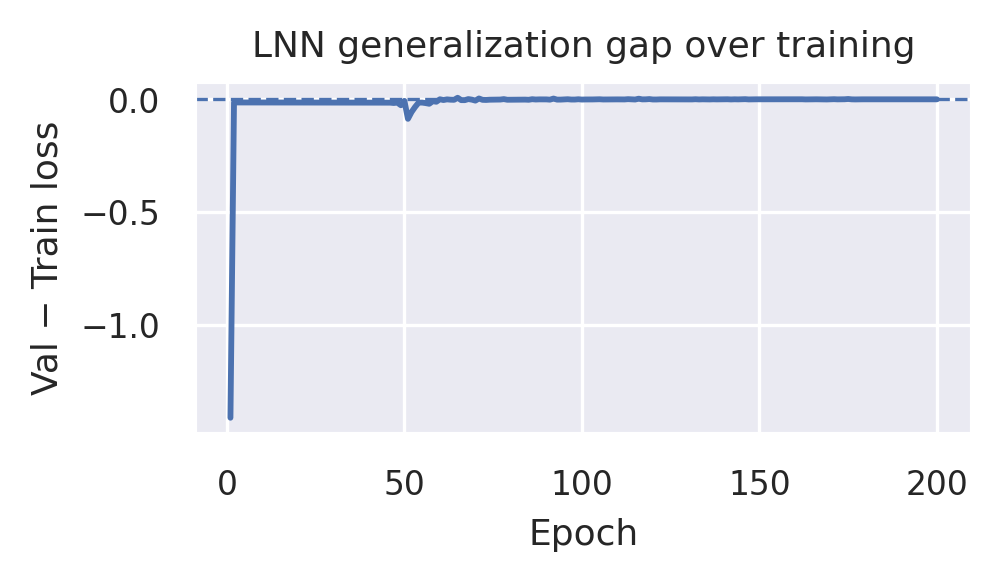

In [2]:
gap = [v - t for t, v in zip(train_loss, val_loss)]

fig, ax = plt.subplots(figsize=(3.4, 2.0), dpi=300)

sns.lineplot(x=epochs, y=gap, ax=ax, linewidth=1.4)

ax.axhline(0.0, linestyle="--", linewidth=0.8)
ax.set_xlabel("Epoch")
ax.set_ylabel("Val − Train loss")
ax.set_title("LNN generalization gap over training")

fig.tight_layout()
fig.savefig(OUT_DIR / "lnn_generalization_gap.png", bbox_inches="tight")
plt.show()


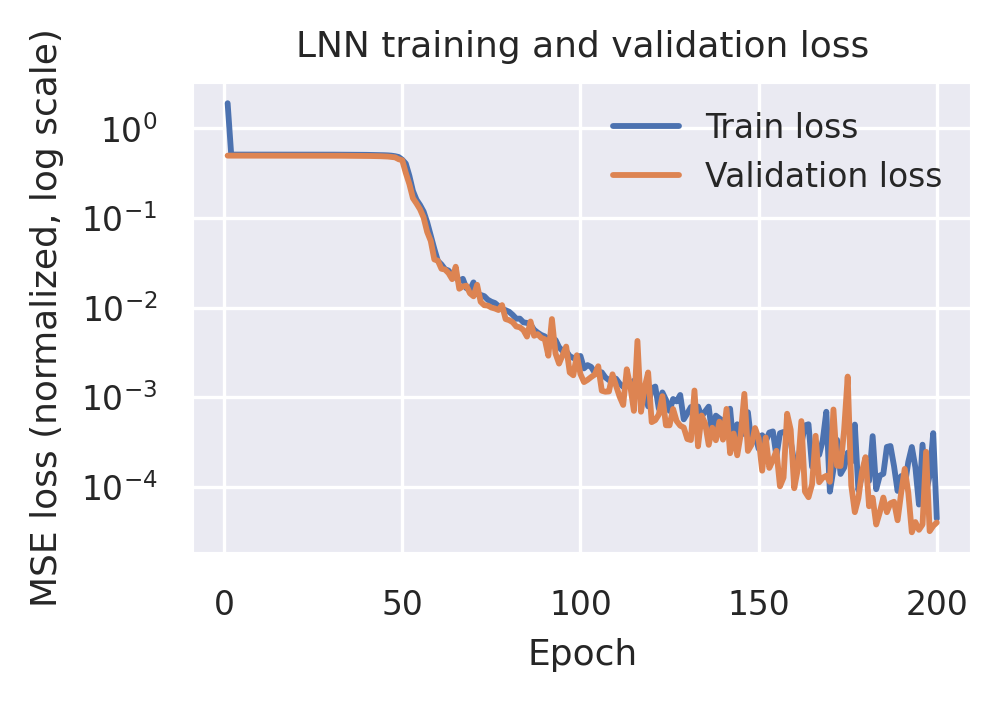

In [5]:
import json
from pathlib import Path

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# ---------------- Paths ----------------
OUT_DIR = Path("/home/iitgn-robotics/Debojit_WS/double-pendulum-trajectory/data/SampleIdeal2/lnn_model_Final1_5sec")
metrics_path = OUT_DIR / "metrics.json"

with open(metrics_path, "r") as f:
    metrics = json.load(f)

train_loss = metrics["history"]["train_loss"]
val_loss   = metrics["history"]["val_loss"]
epochs = list(range(1, len(train_loss) + 1))

# ---------------- Seaborn style for IEEE two-column ----------------
sns.set_theme(
    style="darkgrid",   # dark grid
    context="paper",    # good sizing for papers
    font_scale=0.9,
)

# Typical single-column IEEE figure ~3.4 in wide
fig, ax = plt.subplots(figsize=(3.4, 2.4), dpi=300)

# Put into a DataFrame so we can use seaborn.lineplot nicely
df = pd.DataFrame({
    "Epoch": epochs,
    "Train loss": train_loss,
    "Validation loss": val_loss,
})

# Melt to long format for seaborn
df_melt = df.melt(id_vars="Epoch", var_name="Split", value_name="Loss")

# Plot
sns.lineplot(
    data=df_melt,
    x="Epoch",
    y="Loss",
    hue="Split",
    ax=ax,
    linewidth=1.4,
)

# Log scale on y-axis
ax.set_yscale("log")

ax.set_xlabel("Epoch")
ax.set_ylabel("MSE loss (normalized, log scale)")
ax.set_title("LNN training and validation loss")
ax.legend(loc="upper right", frameon=False)

fig.tight_layout()
fig.savefig(OUT_DIR / "lnn_train_val_loss_logy.png", bbox_inches="tight")
plt.show()


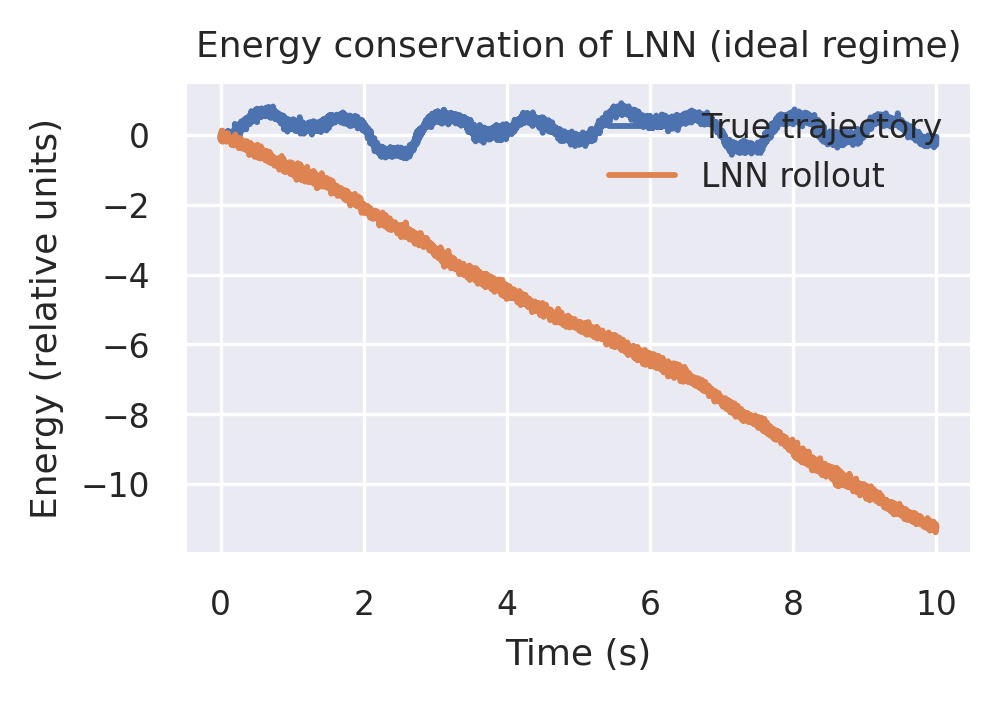

In [4]:
#!/usr/bin/env python3
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path

# ---------------- Paths ----------------
OUT_DIR  = Path("/home/iitgn-robotics/Debojit_WS/double-pendulum-trajectory/data/SampleIdeal2/lnn_model_Final1_5sec/eval_lnn")
csv_path = OUT_DIR / "double_pendulum_traj_ideal_run001_lnn_timeseries.csv"  # <-- change file here

df = pd.read_csv(csv_path)

# Optional: shift energies so both start at zero (nicer for plotting drift)
E0 = df["E_true_LNN"].iloc[0]
df["E_true_shift"] = df["E_true_LNN"] - E0
df["E_pred_shift"] = df["E_pred_LNN"] - E0

# ---------------- Seaborn style (match training-loss slide) ----------------
sns.set_theme(
    style="darkgrid",   # dark grid
    context="paper",    # good for IEEE-style figures
    font_scale=0.9,
)

# Typical single-column IEEE figure
fig, ax = plt.subplots(figsize=(3.4, 2.4), dpi=300)

# Long format for seaborn
plot_df = df.melt(
    id_vars="t",
    value_vars=["E_true_shift", "E_pred_shift"],
    var_name="Source",
    value_name="Energy",
)

# Nicer legend labels
plot_df["Source"] = plot_df["Source"].map({
    "E_true_shift": "True trajectory",
    "E_pred_shift": "LNN rollout",
})

sns.lineplot(
    data=plot_df,
    x="t",
    y="Energy",
    hue="Source",
    ax=ax,
    linewidth=1.4,
)

ax.set_xlabel("Time (s)")
ax.set_ylabel("Energy (relative units)")
ax.set_title("Energy conservation of LNN (ideal regime)")
ax.legend(loc="upper right", frameon=False)

fig.tight_layout()
fig.savefig(OUT_DIR / f"{csv_path.stem}_energy.png", bbox_inches="tight")
plt.show()

In [10]:
# ------------------------------------------------------------------------------
# Plot tip trajectory (2D X–Z) from CSV + initial configuration (read from CSV)
# - Correct Y-axis rotation FK: z = -sin(theta)
# - Frame: base-relative or world (no double shifts)
# - Uses seaborn darkgrid style for nicer IEEE-style plots
# ------------------------------------------------------------------------------

import sys, os, math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  # NEW

# --- global seaborn style (like your LNN loss plots) ---
sns.set_theme(
    style="darkgrid",   # dark grid as you asked
    context="paper",    # good sizing for papers
    font_scale=0.9,     # tweak if you want slightly bigger/smaller text
)

# --- params (match your sim/export) ---
L1 = 1.0
L2 = 1.0
BASE_X = 0.0
BASE_Z = 2.5
BASE_RELATIVE = False   # True → plot in base frame; False → world frame


def load_csv(csv_path):
    """
    CSV header expected:
    t,q1,q2,dq1,dq2,tip_x,tip_y,tip_z,tip_x_rel,tip_z_rel,elbow_x,elbow_z,step_idx
    Angles q1,q2 are in radians (as saved by your recorder).
    """
    return np.genfromtxt(csv_path, delimiter=",", names=True)


def fk_yaxis_xz(q1, q2, L1, L2, base_x, base_z):
    """
    Forward kinematics in X–Z plane for joints rotating about +Y.
    Uses MuJoCo's right-handed convention: z = -sin(theta).
    q1, q2 in radians; q2 is RELATIVE to link1.
    Returns p0(base), p1(elbow), p2(tip).
    """
    th1 = q1
    th12 = q1 + q2

    p0 = (base_x, base_z)
    p1 = (base_x + L1 * math.cos(th1), base_z - L1 * math.sin(th1))
    p2 = (p1[0] + L2 * math.cos(th12), p1[1] - L2 * math.sin(th12))
    return p0, p1, p2


def plot_tip_with_overlay(data, base_relative, out_path=None, show=True):
    # Choose trajectory columns directly (avoid recomputation)
    if base_relative:
        x = data["tip_x_rel"]
        z = data["tip_z_rel"]
        base_x, base_z = 0.0, 0.0
        title = "Double Pendulum — Tip Trajectory (X–Z, Base-relative)"
        base_label = "Base (0, 0)"
    else:
        x = data["tip_x"]
        z = data["tip_z"]
        base_x, base_z = BASE_X, BASE_Z
        title = (
            "Double Pendulum — Tip Trajectory (X–Z, World)\n"
            f"Base at ({BASE_X:.2f}, {BASE_Z:.2f})"
        )
        base_label = f"Base ({BASE_X:.2f}, {BASE_Z:.2f})"

    # Initial joint angles from the recorded data (radians)
    q1_0 = float(data["q1"][0])
    q2_0 = float(data["q2"][0])
    q1_deg = math.degrees(q1_0)
    q2_deg = math.degrees(q2_0)

    # Initial configuration overlay (in the SAME frame as the trajectory)
    p0, p1, p2 = fk_yaxis_xz(q1_0, q2_0, L1, L2, base_x, base_z)

    # Markers
    x0, z0 = x[0], z[0]
    xN, zN = x[-1], z[-1]

    fig, ax = plt.subplots(figsize=(3.4, 3.4), dpi=300)  # IEEE-ish size

    # Tip trajectory
    ax.plot(x, z, linewidth=1.8, label="Tip trajectory")

    # Dotted initial links
    ax.plot([p0[0], p1[0]], [p0[1], p1[1]],
            "k:", linewidth=2.0, label=f"Link 1 ({q1_deg:.1f}°)")
    ax.plot([p1[0], p2[0]], [p1[1], p2[1]],
            "k:", linewidth=2.0, label=f"Link 2 (+{q2_deg:.1f}° rel.)")

    # Points
    ax.scatter([p0[0]], [p0[1]], s=40, color="k", label=base_label)
    ax.scatter([x0], [z0], s=36, marker="^", label="Start tip")
    ax.scatter([xN], [zN], s=36, marker="s", label="End tip")

    ax.set_aspect("equal", adjustable="box")
    ax.set_xlabel("X (m)")
    ax.set_ylabel("Z (m)")
    ax.set_title(title)
    ax.legend(loc="best", frameon=False)

    fig.tight_layout()

    # if out_path:
    #     fig.savefig(out_path, dpi=300, bbox_inches="tight")
    #     print(f"[✓] Saved plot to: {out_path}")
    if show:
        plt.show()
    plt.close(fig)


def plot_joint_space(data, out_path=None, show=True):
    """
    Joint-space trajectory: q2 vs q1 (phase plot) in radians.
    Uses seaborn styling via the global sns.set_theme call.
    """
    q1 = data["q1"]
    q2 = data["q2"]

    fig, ax = plt.subplots(figsize=(3.4, 3.4), dpi=300)

    # Simple line in joint space (can switch to scatter if you prefer)
    ax.plot(q1, q2, linewidth=1.2, label="Trajectory in joint space")

    # Mark start and end
    ax.scatter([q1[0]], [q2[0]], s=30, marker="^", label="Start")
    ax.scatter([q1[-1]], [q2[-1]], s=30, marker="s", label="End")

    ax.set_xlabel(r"$q_1$ (rad)")
    ax.set_ylabel(r"$q_2$ (rad)")
    ax.set_title("Double Pendulum — Joint-space Trajectory")
    ax.legend(loc="best", frameon=False)

    fig.tight_layout()

    # if out_path:
    #     fig.savefig(out_path, dpi=300, bbox_inches="tight")
    #     print(f"[✓] Saved joint-space plot to: {out_path}")
    if show:
        plt.show()
    plt.close(fig)


def main():
    csv_path = sys.argv[1] if len(sys.argv) > 1 else \
        "/home/iitgn-robotics/Debojit_WS/double-pendulum-trajectory/data/SampleIdeal1/double_pendulum_traj_ideal_run1956.csv"
    if not os.path.isfile(csv_path):
        print(f"[x] CSV not found: {csv_path}")
        sys.exit(1)

    data = load_csv(csv_path)
    suffix = "base" if BASE_RELATIVE else "world"
    out_png_tip = os.path.join(
        os.path.dirname(csv_path),
        f"tip_traj_xz_with_links_{suffix}.png"
    )
    out_png_js = os.path.join(
        os.path.dirname(csv_path),
        f"joint_space_traj_{suffix}.png"
    )

    # Tip trajectory (X–Z)
    plot_tip_with_overlay(data, BASE_RELATIVE, out_path=out_png_tip, show=True)

    # Joint-space trajectory (q1 vs q2)
    plot_joint_space(data, out_path=out_png_js, show=True)


if __name__ == "__main__":
    main()


[x] CSV not found: --f=/run/user/1000/jupyter/runtime/kernel-v307301beed4ac7461ef10ccf430b47c61af531399.json


SystemExit: 1